# Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Value Iterations

In [39]:
grid_size = 9
goal_state = (8, 8)
obstacles = [(1, 3), (2, 3), (3, 3), (3, 2), (3, 1),
         (5, 5), (6, 5), (7, 5), (8, 5), (5, 6), (5, 7), (5, 8)]
in_portal = (2, 2)
out_portal = (6, 6)

actions = [(1, 0), (-1, 0), (0, -1), (0, 1)]

# Initialize value function and policy
V = np.zeros((grid_size, grid_size))
policy = np.zeros((grid_size, grid_size), dtype=int)

gamma = 0.9

def reward(state):
    return 1 if state == goal_state else 0

# Define the transition function
def next_state(state, action):

    new_state = (state[0] + action[0], state[1] + action[1])
    if new_state == in_portal:
        return out_portal
    if new_state in obstacles or new_state[0] <= 0 or new_state[1] <= 0 or new_state[0] >= grid_size or new_state[1] >= grid_size:
        return state 
    return new_state

# Value Iteration
def value_iteration(V, max_iterations=1000, tol=1e-4):
    for _ in range(max_iterations):
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                if state == goal_state:
                    continue
                max_value = -float('inf')
                for idx, action in enumerate(actions):
                    next_s = next_state(state, action)
                    value = reward(next_s) + gamma * V[next_s]
                    if value > max_value:
                        max_value = value
                        policy[i, j] = idx
                delta = max(delta, abs(max_value - V[state]))
                V[state] = max_value
        if delta < tol:
            break
    return V, policy

optimal_V, optimal_policy = value_iteration(V)

# Policy Iterations

In [50]:
# Policy Evaluation
def policy_evaluation(policy, V, max_iterations=1000, tol=1e-4):
    for _ in range(max_iterations):
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                if state == goal_state:
                    continue
                action = actions[policy[i, j]]
                # print(action)
                next_s = next_state(state, action)
                new_value = reward(next_s) + gamma * V[next_s]
                delta = max(delta, abs(new_value - V[state]))
                V[state] = new_value
        if delta < tol:
            break
    return V

# Policy Improvement
def policy_improvement(V, policy):
    stable = True
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if state == goal_state:
                continue
            old_action = policy[i, j]
            max_value = -float('inf')
            for idx, action in enumerate(actions):
                next_s = next_state(state, action)
                value = reward(next_s) + gamma * V[next_s]
                if value > max_value:
                    max_value = value
                    policy[i, j] = idx
            if old_action != policy[i, j]:
                stable = False
    return stable, policy

# Policy Iteration
def policy_iteration(policy, V, max_iterations=1000):
    for _ in range(max_iterations):
        V = policy_evaluation(policy, V)
        stable, policy = policy_improvement(V, policy)
        if stable:
            break
    return V, policy

optimal_V_pi, optimal_policy_pi = policy_iteration(policy, V)

# Define plotting function 

In [ ]:
action_labels = ['↓', '↑', '←', '→'] 

def plot_values_policy(V, policy):
    fig, ax = plt.subplots(figsize=(10, 10))

    cmap = plt.get_cmap('viridis')
    norm = mcolors.Normalize(vmin=np.min(V), vmax=np.max(V))

    c = ax.imshow(V, cmap=cmap, norm=norm, interpolation='nearest')
    fig.colorbar(c, ax=ax, orientation='vertical', label='Value')

    for obs in obstacles:
        ax.add_patch(plt.Rectangle((obs[1] - 0.5, obs[0] - 0.5), 1, 1, color='black'))

    ax.add_patch(plt.Rectangle((goal_state[1] - 0.5, goal_state[0] - 0.5), 1, 1, color='gold'))

    ax.add_patch(plt.Circle((in_portal[1], in_portal[0]), 0.3, color='blue', label='In'))
    ax.add_patch(plt.Circle((out_portal[1], out_portal[0]), 0.3, color='red', label='Out'))

    U = np.zeros((grid_size, grid_size))
    V = np.zeros((grid_size, grid_size))

    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) not in obstacles and (i, j) != goal_state:
                action_idx = policy[i, j]
                if action_idx is not None:
                    action = actions[action_idx]
                    U[i, j] = action[1]
                    V[i, j] = action[0]

    ax.quiver(np.arange(grid_size), np.arange(grid_size), U, V, angles='xy', scale_units='xy', scale=1, color='red')

    # Set labels and grid
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_title('Quiver Plot')

    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

## Visualize the optimal policy for Value Iteration by plotting a quiver plot

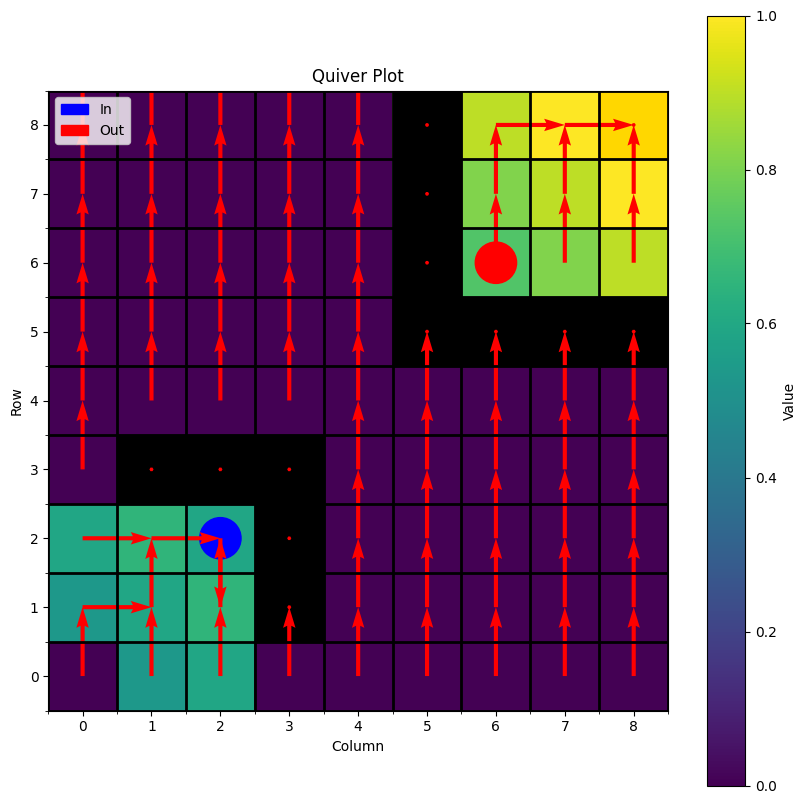

In [48]:

plot_values_policy(optimal_V, optimal_policy)

## Visualize the optimal policy for Policy Iteration by plotting a quiver plot

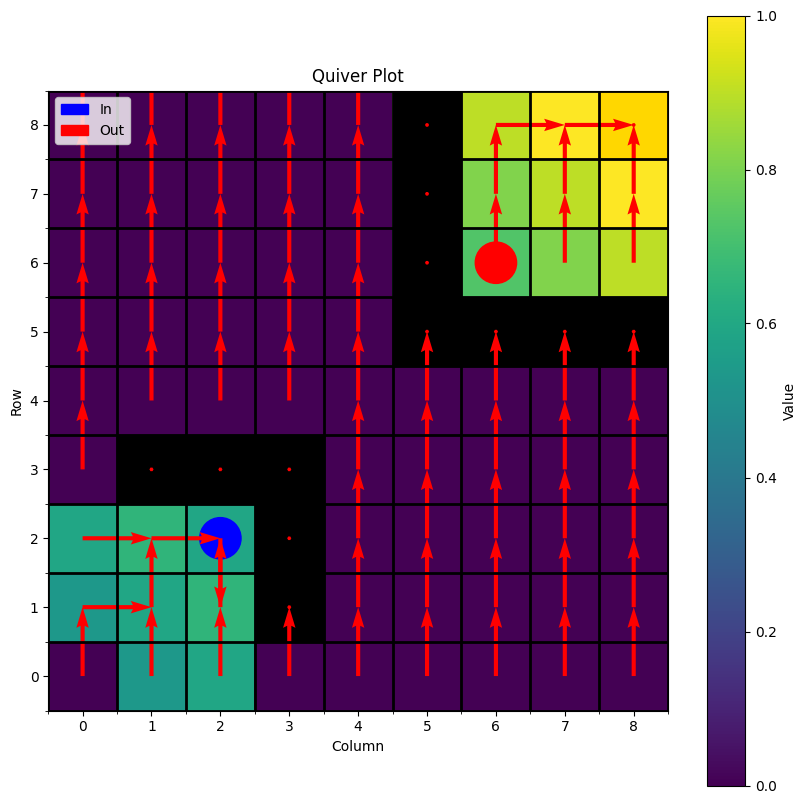

In [47]:

plot_values_policy(optimal_V_pi, optimal_policy_pi)